In [ ]:
# Install required packages.
import os

#!pip install torch==1.7.0
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)


!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install git+https://github.com/rusty1s/pytorch_geometric.git

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/rusty1s/pytorch_geometric.git to /tmp/pip-req-build-nqb1fbch
  Running command git clone --filter=blob:none --quiet https://github.com/rusty1s/pytorch_geometric.git /tmp/pip-req-build-nqb1fbch
  Resolved https://github.com/rusty1s/pytorch_geometric.git to commit 7ac4654db727df73d1443c5102020abe859e5eb6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import argparse
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from math import sqrt
import math

from torch_geometric.datasets import TUDataset

import torch as th
import torch
import torch.nn as nn
from torch import Tensor
from torch.nn.parameter import Parameter
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch.nn import Linear, LayerNorm
from sklearn import metrics
from scipy.spatial.distance import hamming
import statistics
import pandas
from time import perf_counter
from IPython.core.display import deepcopy
from torch_geometric.nn import MessagePassing
import copy
from torch.nn import ReLU, Sequential
from torch import sigmoid
from itertools import chain
from time import perf_counter
from torch_geometric.data import Data, Batch, Dataset
from functools import partial
from torch_geometric.utils import to_networkx
from torch_geometric.utils import remove_self_loops
from typing import Callable, Union, Optional
#from torch_geometric.utils.num_nodes import maybe_num_nodes
import networkx as nx
from typing import List, Tuple, Dict
from collections import Counter
import statistics
from scipy import stats
import logging
import pandas as pd
import csv


from torch_geometric.nn import GCNConv, global_mean_pool
from torch_geometric.loader import DataLoader
import torch_geometric.nn as gnn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = TUDataset(root='data/TUDataset', name='MUTAG')

Extracting data/TUDataset/MUTAG/MUTAG.zip
Processing...
Done!


In [ ]:
Explainability_name = 'PGMExplainer'
Task_name = 'Graph Classification'
Model_Name = "GIN"
checkpoint_directory_Classifier = "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/model_classifier.pt"
classifier_lr = 0.001
classifier_dropout = 0.5
classifier_weight_decay = 1e-6
classifier_bias = True
DataSet_name = "MUTAG"

File_Name = Model_Name + " " + Explainability_name + " " + Task_name + " " + DataSet_name + " "

In [ ]:
#train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=0, shuffle=True)
#print("Number of Training Graphs: ", len(train_dataset))
#print("Number of Test Graphs: ", len(test_dataset))

df = pandas.read_csv("/content/drive/My Drive/Explainability Methods/Train and Test Indexes on Graph Classification/Experimental Results/train_test_indexes.csv")

read_training_list_indexes__ = df['Train Indexes']
read_test_list_indexes__ = df['Test Indexes']
read_test_list_indexes__ = read_test_list_indexes__.dropna()
read_test_list_indexes = []
read_training_list_indexes = []
for element in read_test_list_indexes__:
    read_test_list_indexes.append(int(element))
for element in read_training_list_indexes__:
    read_training_list_indexes.append(int(element))


print(read_training_list_indexes)
print(read_test_list_indexes)

train_dataset = []
test_dataset = []
for index in read_training_list_indexes:
    train_dataset.append(dataset[index])
for index in read_test_list_indexes:
    test_dataset.append(dataset[index])


print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

[51, 142, 143, 10, 4, 141, 125, 23, 3, 79, 28, 117, 136, 156, 83, 128, 109, 70, 31, 58, 7, 148, 14, 187, 20, 162, 123, 13, 91, 185, 169, 102, 32, 55, 119, 25, 161, 175, 52, 121, 152, 108, 113, 65, 39, 103, 131, 42, 166, 110, 160, 68, 90, 89, 64, 172, 159, 72, 170, 18, 122, 29, 179, 49, 171, 178, 9, 74, 96, 48, 181, 127, 126, 87, 12, 163, 88, 53, 94, 146, 5, 158, 16, 67, 6, 59, 164, 151, 34, 47, 54, 46, 100, 112, 93, 182, 66, 106, 124, 19, 186, 133, 45, 15, 40, 167, 174, 98, 105, 153, 61, 63, 132, 116, 43, 80, 33, 147, 165, 69, 135, 86, 76, 57, 173, 115, 138, 140, 134, 180, 95, 22, 38, 41, 24, 120, 145, 26, 21, 50, 176, 107, 78, 17, 85, 154, 60, 92, 184, 129]
[0, 1, 2, 8, 11, 27, 30, 35, 36, 37, 44, 56, 62, 71, 73, 75, 77, 81, 82, 84, 97, 99, 101, 104, 111, 114, 118, 130, 137, 139, 144, 149, 150, 155, 157, 168, 177, 183]
Number of training graphs: 150
Number of test graphs: 38


In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Models/Script/'
sys.path.insert(0,py_path)

import GIN as gin_model
GNN_Model = gin_model.GIN_Model(num_mlp_layers=4, Bias=classifier_bias, num_slp_layers=2, mlp_input_dim=7, mlp_hid_dim=7,
                                mlp_output_dim=2, mlp_act_fun="ReLu", dropout_rate=classifier_dropout,
                                Weight_Initializer=3, joint_embeddings=False)

In [ ]:
GNN_Model_Optimizer = torch.optim.Adam(GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_dropout)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
def loss_calculations(preds, gtruth):
    loss_per_epoch = criterion(preds, gtruth)
    return loss_per_epoch

In [ ]:
def visualize_losses(GNN_Model_losses, epoch_history):
    GNN_Model_losses_list = torch.stack(GNN_Model_losses).cpu().detach().numpy()

    fig = plt.figure(figsize=(27,20))

    ax = plt.subplot2grid((3, 1), (0, 0), colspan=1)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(" Loss in Epoch: " + str(epoch_history))

    ax.plot(GNN_Model_losses_list, color='r')

    plt.savefig('/content/drive/My Drive/Explainability Methods/'+str(Explainability_name)+' on ' + str(Task_name) + '/Experimental Results/' + File_Name + 'Loss_til_epoch_{:04d}.png'.format(epoch_history))
    plt.show()


In [ ]:
def train_step():
    GNN_Model_loss_batch = []
    Pred_Labels = []
    Real_Labels = []

    GNN_Model.train()
    GNN_Model.zero_grad()
    for batch_of_graphs in train_dataloader:

        mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, lin2_output_softmaxed = GNN_Model(batch_of_graphs, None)
        batch_loss = loss_calculations(lin2_output_softmaxed, batch_of_graphs.y)
        Pred_Labels.extend(lin2_output_softmaxed.argmax(dim=1).detach().tolist())

        Real_Labels.extend(batch_of_graphs.y.detach().tolist())
        GNN_Model_loss_batch.append(batch_loss)

        batch_loss.backward()
        GNN_Model_Optimizer.step()

    return torch.mean(torch.tensor(GNN_Model_loss_batch)), metrics.accuracy_score(Real_Labels, Pred_Labels)

In [ ]:
GNN_Model_training_Acc_per_epoch = []
GNN_Model_training_time_per_epoch = []
def train(EPOCHS, load_index):
    GNN_Model_training_loss_per_epoch = []

    for epoch in range(EPOCHS):
        t1 = perf_counter()
        GNN_Model_training_loss, training_acc = train_step()
        GNN_Model_training_time_per_epoch.append(perf_counter()-t1)
        print(f'Epoch: {epoch+1:03d}, Model Loss: {GNN_Model_training_loss:.4f}')

        GNN_Model_training_loss_per_epoch.append(GNN_Model_training_loss)
        GNN_Model_training_Acc_per_epoch.append(training_acc)
        #break

        if (epoch + load_index + 1) % 50 == 0 and epoch > 0:
            visualize_losses(GNN_Model_training_loss_per_epoch, epoch + load_index + 1)
        if (epoch + load_index + 1) % 100 == 0 and epoch > 0:
            torch.save({'epoch': epoch+load_index+1, 'model_state_dict': GNN_Model.state_dict(), 'optimizer_state_dict': GNN_Model_Optimizer.state_dict(), 'loss': GNN_Model_training_loss_per_epoch,}, "/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(epoch + load_index + 1)+".pt")



Epoch: 001, Model Loss: 0.6205
Epoch: 002, Model Loss: 0.6090
Epoch: 003, Model Loss: 0.6114
Epoch: 004, Model Loss: 0.6130
Epoch: 005, Model Loss: 0.6141
Epoch: 006, Model Loss: 0.5900
Epoch: 007, Model Loss: 0.6115
Epoch: 008, Model Loss: 0.5842
Epoch: 009, Model Loss: 0.5980
Epoch: 010, Model Loss: 0.5965
Epoch: 011, Model Loss: 0.5916
Epoch: 012, Model Loss: 0.6133
Epoch: 013, Model Loss: 0.5849
Epoch: 014, Model Loss: 0.5883
Epoch: 015, Model Loss: 0.5858
Epoch: 016, Model Loss: 0.5886
Epoch: 017, Model Loss: 0.5780
Epoch: 018, Model Loss: 0.5922
Epoch: 019, Model Loss: 0.5863
Epoch: 020, Model Loss: 0.5806
Epoch: 021, Model Loss: 0.5744
Epoch: 022, Model Loss: 0.5810
Epoch: 023, Model Loss: 0.5807
Epoch: 024, Model Loss: 0.5749
Epoch: 025, Model Loss: 0.5775
Epoch: 026, Model Loss: 0.5721
Epoch: 027, Model Loss: 0.5861
Epoch: 028, Model Loss: 0.5850
Epoch: 029, Model Loss: 0.5816
Epoch: 030, Model Loss: 0.5954
Epoch: 031, Model Loss: 0.5766
Epoch: 032, Model Loss: 0.5714
Epoch: 0

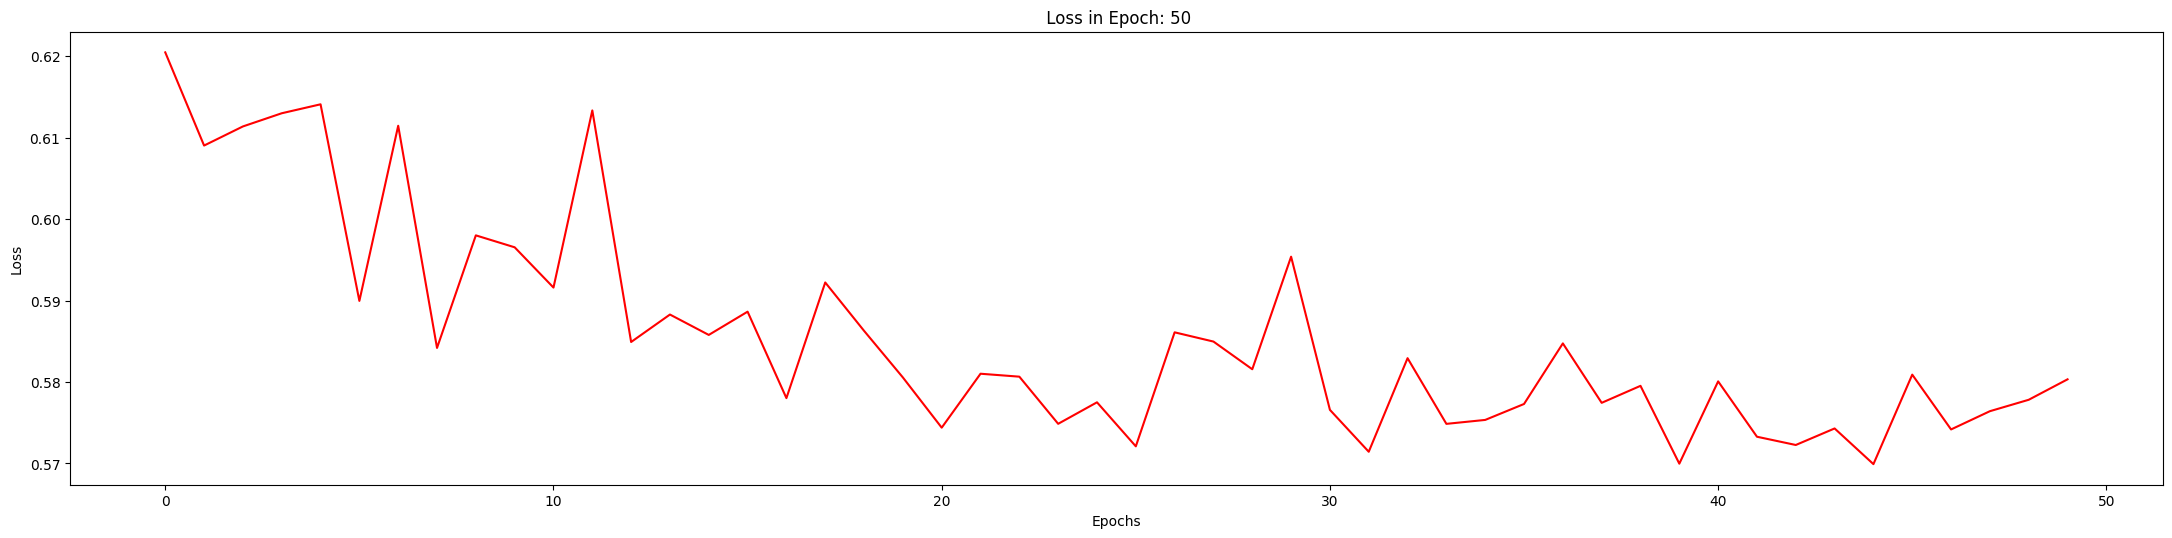

Epoch: 051, Model Loss: 0.5693
Epoch: 052, Model Loss: 0.5688
Epoch: 053, Model Loss: 0.5679
Epoch: 054, Model Loss: 0.5792
Epoch: 055, Model Loss: 0.5701
Epoch: 056, Model Loss: 0.5716
Epoch: 057, Model Loss: 0.5807
Epoch: 058, Model Loss: 0.5744
Epoch: 059, Model Loss: 0.5657
Epoch: 060, Model Loss: 0.5684
Epoch: 061, Model Loss: 0.5715
Epoch: 062, Model Loss: 0.5781
Epoch: 063, Model Loss: 0.5609
Epoch: 064, Model Loss: 0.5740
Epoch: 065, Model Loss: 0.5697
Epoch: 066, Model Loss: 0.5655
Epoch: 067, Model Loss: 0.5717
Epoch: 068, Model Loss: 0.5684
Epoch: 069, Model Loss: 0.5707
Epoch: 070, Model Loss: 0.5706
Epoch: 071, Model Loss: 0.5698
Epoch: 072, Model Loss: 0.5656
Epoch: 073, Model Loss: 0.5715
Epoch: 074, Model Loss: 0.5716
Epoch: 075, Model Loss: 0.5722
Epoch: 076, Model Loss: 0.5691
Epoch: 077, Model Loss: 0.5651
Epoch: 078, Model Loss: 0.5666
Epoch: 079, Model Loss: 0.5701
Epoch: 080, Model Loss: 0.5602
Epoch: 081, Model Loss: 0.5685
Epoch: 082, Model Loss: 0.5739
Epoch: 0

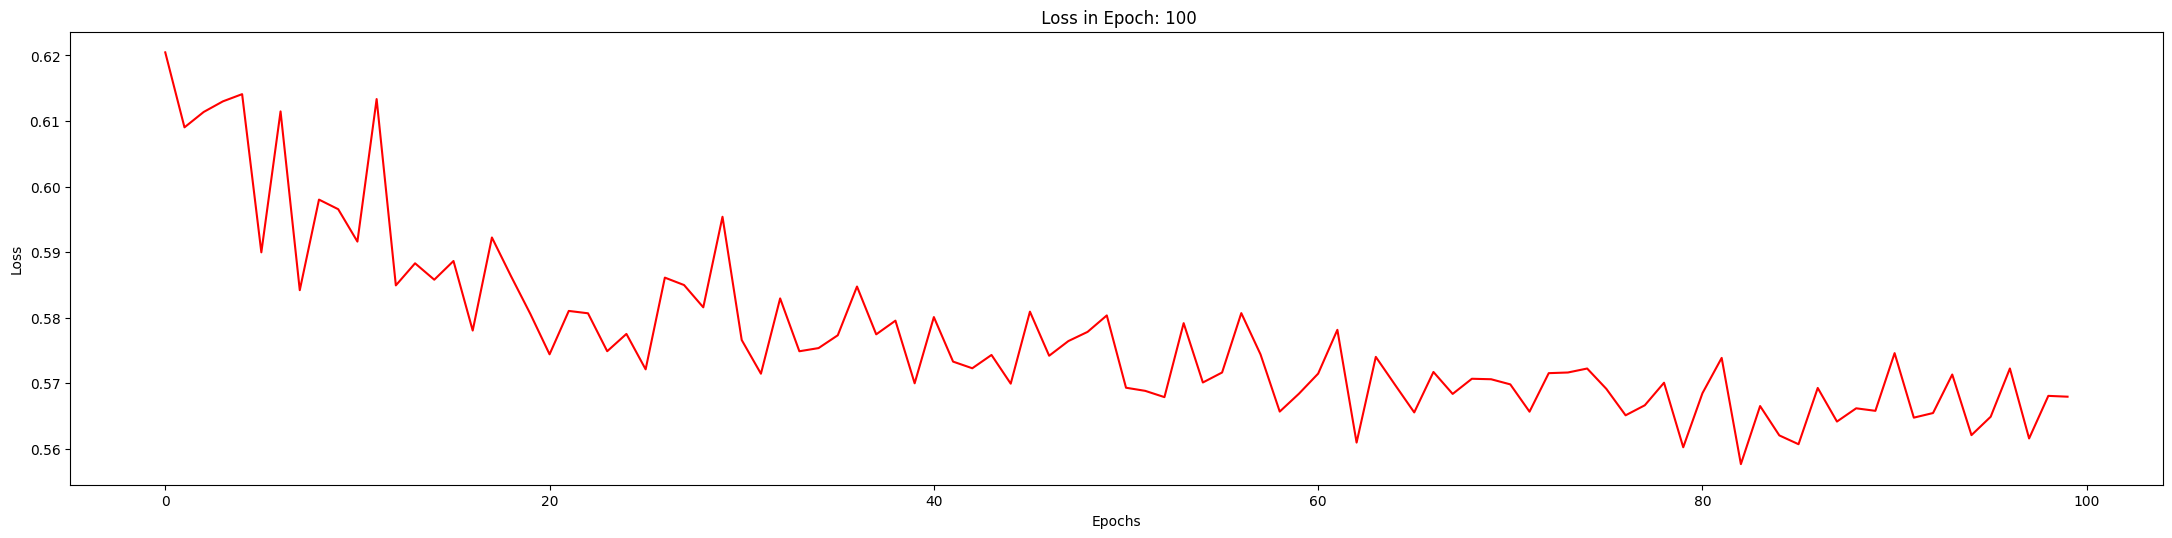

Epoch: 101, Model Loss: 0.5676
Epoch: 102, Model Loss: 0.5695
Epoch: 103, Model Loss: 0.5713
Epoch: 104, Model Loss: 0.5690
Epoch: 105, Model Loss: 0.5636
Epoch: 106, Model Loss: 0.5713
Epoch: 107, Model Loss: 0.5739
Epoch: 108, Model Loss: 0.5651
Epoch: 109, Model Loss: 0.5711
Epoch: 110, Model Loss: 0.5592
Epoch: 111, Model Loss: 0.5593
Epoch: 112, Model Loss: 0.5643
Epoch: 113, Model Loss: 0.5633
Epoch: 114, Model Loss: 0.5725
Epoch: 115, Model Loss: 0.5706
Epoch: 116, Model Loss: 0.5742
Epoch: 117, Model Loss: 0.5717
Epoch: 118, Model Loss: 0.5703
Epoch: 119, Model Loss: 0.5720
Epoch: 120, Model Loss: 0.5759
Epoch: 121, Model Loss: 0.5688
Epoch: 122, Model Loss: 0.5691
Epoch: 123, Model Loss: 0.5688
Epoch: 124, Model Loss: 0.5745
Epoch: 125, Model Loss: 0.5706
Epoch: 126, Model Loss: 0.5607
Epoch: 127, Model Loss: 0.5631
Epoch: 128, Model Loss: 0.5669
Epoch: 129, Model Loss: 0.5648
Epoch: 130, Model Loss: 0.5605
Epoch: 131, Model Loss: 0.5694
Epoch: 132, Model Loss: 0.5712
Epoch: 1

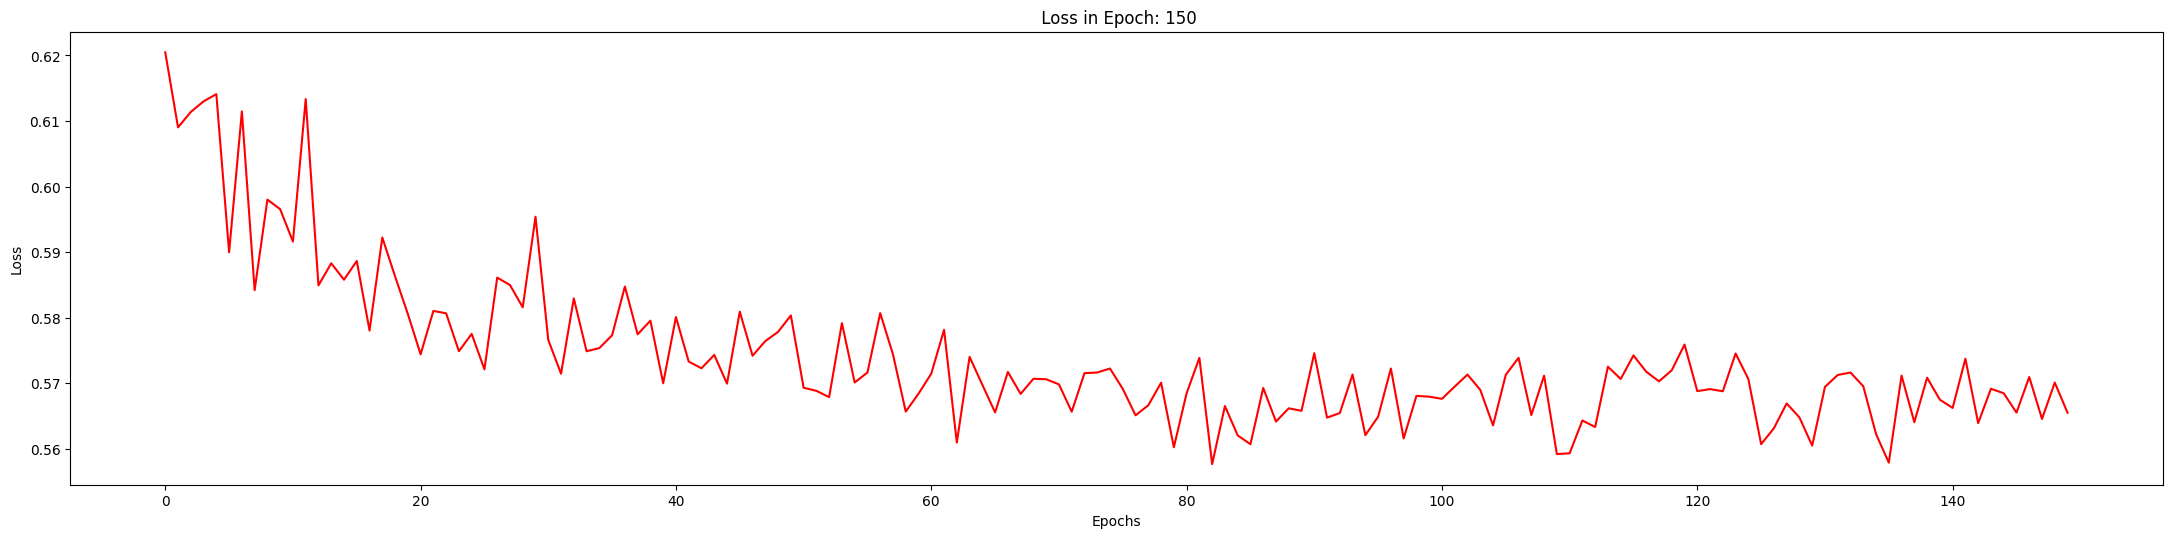

Epoch: 151, Model Loss: 0.5670
Epoch: 152, Model Loss: 0.5691
Epoch: 153, Model Loss: 0.5660
Epoch: 154, Model Loss: 0.5647
Epoch: 155, Model Loss: 0.5592
Epoch: 156, Model Loss: 0.5666
Epoch: 157, Model Loss: 0.5643
Epoch: 158, Model Loss: 0.5695
Epoch: 159, Model Loss: 0.5680
Epoch: 160, Model Loss: 0.5751
Epoch: 161, Model Loss: 0.5704
Epoch: 162, Model Loss: 0.5646
Epoch: 163, Model Loss: 0.5686
Epoch: 164, Model Loss: 0.5672
Epoch: 165, Model Loss: 0.5721
Epoch: 166, Model Loss: 0.5726
Epoch: 167, Model Loss: 0.5664
Epoch: 168, Model Loss: 0.5761
Epoch: 169, Model Loss: 0.5633
Epoch: 170, Model Loss: 0.5665
Epoch: 171, Model Loss: 0.5659
Epoch: 172, Model Loss: 0.5653
Epoch: 173, Model Loss: 0.5730
Epoch: 174, Model Loss: 0.5666
Epoch: 175, Model Loss: 0.5689
Epoch: 176, Model Loss: 0.5598
Epoch: 177, Model Loss: 0.5670
Epoch: 178, Model Loss: 0.5618
Epoch: 179, Model Loss: 0.5715
Epoch: 180, Model Loss: 0.5666
Epoch: 181, Model Loss: 0.5731
Epoch: 182, Model Loss: 0.5690
Epoch: 1

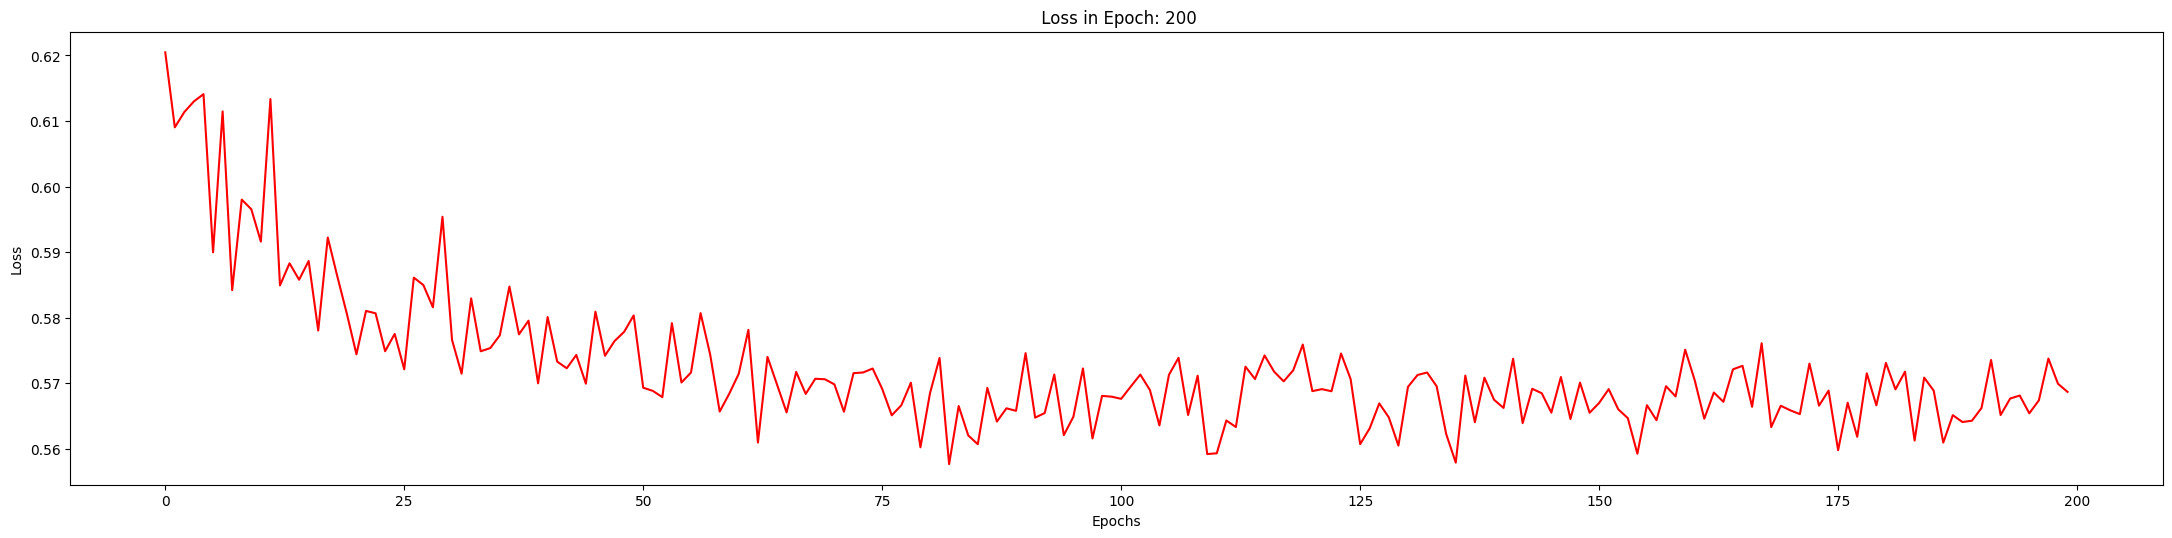

Epoch: 201, Model Loss: 0.5624
Epoch: 202, Model Loss: 0.5675
Epoch: 203, Model Loss: 0.5690
Epoch: 204, Model Loss: 0.5639
Epoch: 205, Model Loss: 0.5665
Epoch: 206, Model Loss: 0.5744
Epoch: 207, Model Loss: 0.5772
Epoch: 208, Model Loss: 0.5619
Epoch: 209, Model Loss: 0.5703
Epoch: 210, Model Loss: 0.5668
Epoch: 211, Model Loss: 0.5656
Epoch: 212, Model Loss: 0.5772
Epoch: 213, Model Loss: 0.5740
Epoch: 214, Model Loss: 0.5635
Epoch: 215, Model Loss: 0.5664
Epoch: 216, Model Loss: 0.5680
Epoch: 217, Model Loss: 0.5699
Epoch: 218, Model Loss: 0.5653
Epoch: 219, Model Loss: 0.5696
Epoch: 220, Model Loss: 0.5678
Epoch: 221, Model Loss: 0.5613
Epoch: 222, Model Loss: 0.5672
Epoch: 223, Model Loss: 0.5650
Epoch: 224, Model Loss: 0.5721
Epoch: 225, Model Loss: 0.5720
Epoch: 226, Model Loss: 0.5666
Epoch: 227, Model Loss: 0.5692
Epoch: 228, Model Loss: 0.5649
Epoch: 229, Model Loss: 0.5652
Epoch: 230, Model Loss: 0.5666
Epoch: 231, Model Loss: 0.5681
Epoch: 232, Model Loss: 0.5717
Epoch: 2

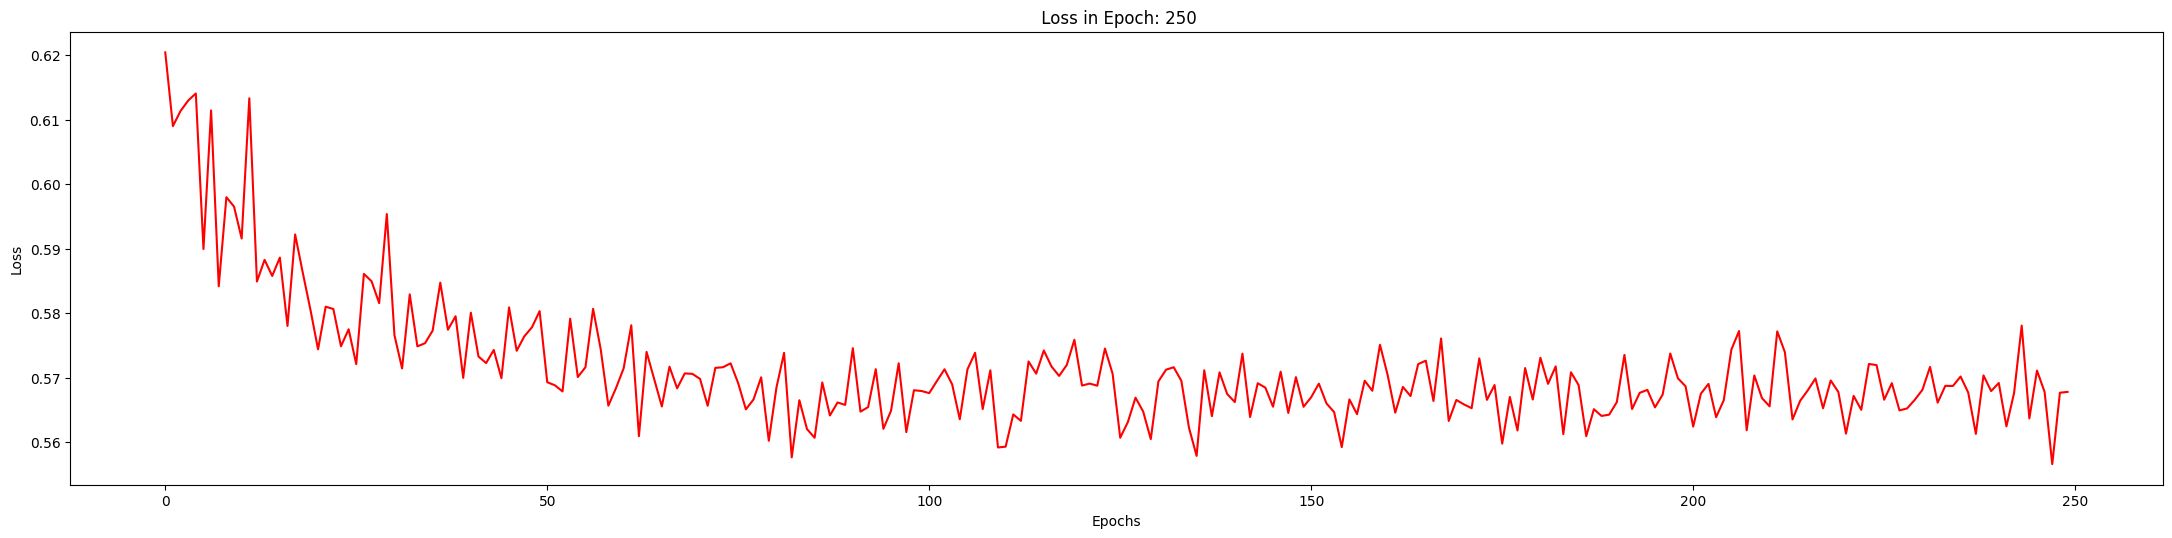

Epoch: 251, Model Loss: 0.5728
Epoch: 252, Model Loss: 0.5649
Epoch: 253, Model Loss: 0.5643
Epoch: 254, Model Loss: 0.5741
Epoch: 255, Model Loss: 0.5644
Epoch: 256, Model Loss: 0.5637
Epoch: 257, Model Loss: 0.5666
Epoch: 258, Model Loss: 0.5681
Epoch: 259, Model Loss: 0.5715
Epoch: 260, Model Loss: 0.5705
Epoch: 261, Model Loss: 0.5600
Epoch: 262, Model Loss: 0.5672
Epoch: 263, Model Loss: 0.5674
Epoch: 264, Model Loss: 0.5718
Epoch: 265, Model Loss: 0.5702
Epoch: 266, Model Loss: 0.5642
Epoch: 267, Model Loss: 0.5733
Epoch: 268, Model Loss: 0.5750
Epoch: 269, Model Loss: 0.5681
Epoch: 270, Model Loss: 0.5663
Epoch: 271, Model Loss: 0.5655
Epoch: 272, Model Loss: 0.5600
Epoch: 273, Model Loss: 0.5640
Epoch: 274, Model Loss: 0.5649
Epoch: 275, Model Loss: 0.5662
Epoch: 276, Model Loss: 0.5644
Epoch: 277, Model Loss: 0.5683
Epoch: 278, Model Loss: 0.5679
Epoch: 279, Model Loss: 0.5631
Epoch: 280, Model Loss: 0.5645
Epoch: 281, Model Loss: 0.5715
Epoch: 282, Model Loss: 0.5672
Epoch: 2

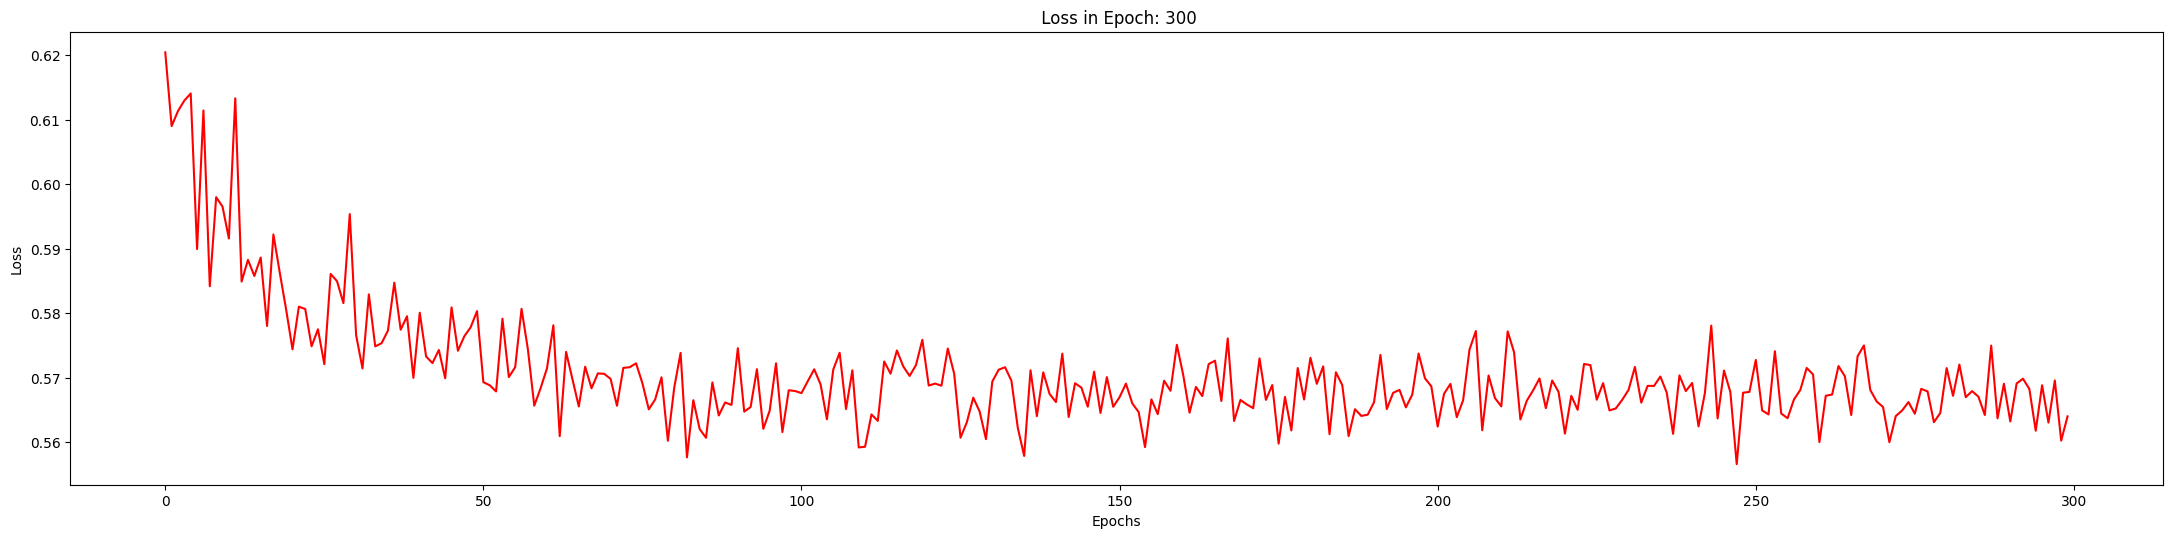

In [ ]:
EPOCHS = 300
load_index = 0

train(EPOCHS, load_index)

In [ ]:
GNN_Model_test_predicted_labels = []
def GNN_Model_test(test_loader):
    GNN_Model.eval()
    correct = 0
    for batch_of_graphs in test_loader:

        mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, lin2_output_softmaxed = GNN_Model(batch_of_graphs, None)
        GNN_Model_test_pred = lin2_output_softmaxed.argmax(dim=1).tolist()[0]

        GNN_Model_test_predicted_labels.append(GNN_Model_test_pred)
        correct += int((GNN_Model_test_pred == batch_of_graphs.y).sum())
    return correct / len(test_loader.dataset), GNN_Model_test_predicted_labels

In [ ]:
GNN_Model_test_acc, predicted_labels = GNN_Model_test(test_dataloader)
print(f'Test Accuracy: {GNN_Model_test_acc:.4f}')

Test Accuracy: 0.6316


In [ ]:
def instance_time(test_dataset):
    instance_based_time = []
    GNN_Model.eval()
    correct = 0
    for batched_data in test_dataset:
        start_generation = perf_counter()

        mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, lin2_output_softmaxed = GNN_Model(batched_data, None)
        GNN_Model_test_pred = lin2_output_softmaxed.argmax(dim=1).tolist()[0]

        consumed_time = perf_counter() - start_generation
        instance_based_time.append(consumed_time)
    return instance_based_time

In [ ]:
samples_time = instance_time(test_dataset)
print(f'Test Instance based Time: {samples_time}')

Test Instance based Time: [0.0067481490000318445, 0.002995238999915273, 0.002955599999950209, 0.01005654699997649, 0.00286042000004727, 0.0024818090000735538, 0.0031735699999444478, 0.0024351490000071863, 0.0017956899999944653, 0.0015886989999671641, 0.0014468299999634837, 0.0018211399999472633, 0.001550069000018084, 0.001474980000011783, 0.0014565400000492446, 0.0013904900000625275, 0.0013366590000032375, 0.0013370299999451163, 0.001303609999922628, 0.0013853000000381144, 0.0012951090000115073, 0.0013156800000615476, 0.001319029999990562, 0.0013084690000368937, 0.0013333189999684691, 0.001343190000056893, 0.0012896399999817731, 0.0013247099999489365, 0.0013371400000323774, 0.0013489299999491777, 0.0013595899999927497, 0.0012987889999749314, 0.0013436500000807428, 0.001312179999899854, 0.0013476799999807554, 0.0013059890000022278, 0.0016561900000624519, 0.0015205500000092798]


In [ ]:
real_labels = []
for graph in test_dataloader:
    real_labels.append(graph.y.tolist()[0])

In [ ]:
print("predicted_labels: ", predicted_labels)
print("real_labels: ", real_labels)
print("Test Accuracy: ", metrics.accuracy_score(real_labels, predicted_labels))

predicted_labels:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
real_labels:  [1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1]
Test Accuracy:  0.631578947368421


In [ ]:
Auc_Roc = metrics.roc_auc_score(real_labels, predicted_labels)
precision, recall, thresholds = metrics.precision_recall_curve(real_labels, predicted_labels)
Auc_Prc = metrics.auc(y=precision, x=recall)
Acc = metrics.accuracy_score(real_labels, predicted_labels, normalize=True)
Acc2 = metrics.accuracy_score(real_labels, predicted_labels, normalize=False)
print("Auc_Roc: ", Auc_Roc, "Auc_Prc: ", Auc_Prc, "Acc: ", Acc, "Acc2: ", Acc2)

Auc_Roc:  0.5 Auc_Prc:  0.8157894736842105 Acc:  0.631578947368421 Acc2:  24


In [ ]:
def power_divergence(X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
    if hasattr(Z, "__iter__"):
        Z = list(Z)
    else:
        raise (f"Z must be an iterable. Got object type: {type(Z)}")

    if (X in Z) or (Y in Z):
        raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
    if len(Z) == 0:
        chi, p_value, dof, expected = stats.chi2_contingency(
            data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
        )
    else:
        chi = 0
        dof = 0
        for z_state, df in data_pertubed_Samples.groupby(Z):
            try:
                c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                chi += c
                dof += d
            except ValueError:
                if isinstance(z_state, str):
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                else:
                    z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                    logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
        p_value = 1 - stats.chi2.cdf(chi, df=dof)
    return chi, p_value, dof

In [ ]:
def cressie_read(X, Y, Z, data_pertubed_Samples, significance_level):
    return power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

In [ ]:
x = [3.01599503e-05, 0.00000000e+00, 2, 3.01599503e-05, 1]
y = np.array(x)
print(y)
z = np.argsort(y)[-3:]
print(z)

[3.01599503e-05 0.00000000e+00 2.00000000e+00 3.01599503e-05
 1.00000000e+00]
[3 4 2]


In [ ]:
class PGM_Graph_Explainer(object):
    def __init__(self, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim, graph, perturb_feature_list, perturb_mode, perturb_indicator):
        self.Model_Name = Model_Name
        self.Task_name = 'Graph Classification'
        self.Explainability_name = "PGMExplainer"
        self.your_model = self.load_model(Task_name=self.Task_name, Explainability_name=self.Explainability_name, Model_Name=Model_Name,
                                          classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim, output_dim=output_dim)
        self.your_model.eval()

        self.graph = graph
        self.num_layers = 2
        self.perturb_feature_list = perturb_feature_list
        self.perturb_mode = perturb_mode
        self.perturb_indicator = perturb_indicator
        self.node_feat = graph.x.numpy()


    def load_model(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        if classifier_load_index != 0:
            GNN_Model, optimizer, classifier_load_index = self.loading_config(Task_name=Task_name, Explainability_name=Explainability_name, Model_Name=Model_Name,
                                                                              classifier_load_index=classifier_load_index, input_dim=input_dim, hid_dim=hid_dim,
                                                                              output_dim=output_dim)
            return GNN_Model
        else:

            GNN_Model = gin_model.GIN_Model(num_mlp_layers=4, Bias=classifier_bias, num_slp_layers=2, mlp_input_dim=7, mlp_hid_dim=7,
                                            mlp_output_dim=7, mlp_act_fun="ReLu", num_classes=2, dropout_rate=classifier_dropout,
                                            Weight_Initializer=3)
            return GNN_Model

    def loading_config(self, Task_name, Explainability_name, Model_Name, classifier_load_index, input_dim, hid_dim, output_dim):

        GNN_Model = gin_model.GIN_Model(num_mlp_layers=4, Bias=classifier_bias, num_slp_layers=2, mlp_input_dim=7, mlp_hid_dim=7,
                                        mlp_output_dim=7, mlp_act_fun="ReLu", num_classes=2, dropout_rate=classifier_dropout,
                                        Weight_Initializer=3)
        optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)
        checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(classifier_load_index)+".pt")
        GNN_Model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        loss = checkpoint['loss']

        return GNN_Model, optimizer, epoch

    def cressie_read(self, X, Y, Z, data_pertubed_Samples, significance_level):
        return self.power_divergence(X=X, Y=Y, Z=Z, data_pertubed_Samples=data_pertubed_Samples, lambda_="cressie-read", significance_level=significance_level)

    def power_divergence(self, X, Y, Z, data_pertubed_Samples, lambda_, significance_level):
        if hasattr(Z, "__iter__"):
            Z = list(Z)
        else:
            raise (f"Z must be an iterable. Got object type: {type(Z)}")

        if (X in Z) or (Y in Z):
            raise ValueError(f"The variables X or Y can't be in Z. Found {X if X in Z else Y} in Z.")
        if len(Z) == 0:
            chi, p_value, dof, expected = stats.chi2_contingency(
                data_pertubed_Samples.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_
            )
        else:
            chi = 0
            dof = 0
            for z_state, df in data_pertubed_Samples.groupby(Z):
                try:
                    c, _, d, _ = stats.chi2_contingency(df.groupby([X, Y]).size().unstack(Y, fill_value=0), lambda_=lambda_)
                    chi += c
                    dof += d
                except ValueError:
                    if isinstance(z_state, str):
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {Z[0]}={z_state}. Not enough samples")
                    else:
                        z_str = ", ".join([f"{var}={state}" for var, state in zip(Z, z_state)])
                        logging.info(f"Skipping the test {X} \u27C2 {Y} | {z_str}. Not enough samples")
            p_value = 1 - stats.chi2.cdf(chi, df=dof)
        return chi, p_value, dof


    def perturb_node_features(self, node_feature_matrix, targeted_node_idx, random_perturbation_permission):

        graph_node_features = deepcopy(node_feature_matrix)
        targeted_node_feat_to_perturb_array = deepcopy(graph_node_features[targeted_node_idx])
        # print("targeted_node_feat_to_perturb_array: ", targeted_node_feat_to_perturb_array)
        epsilon = 0.05 * np.max(self.node_feat, axis = 0)

        if random_perturbation_permission == 1:
            for i in range(targeted_node_feat_to_perturb_array.shape[0]):
                if i in self.perturb_feature_list:
                    if self.perturb_mode == "mean":
                        targeted_node_feat_to_perturb_array[i] = np.mean(node_feature_matrix[:,i])
                    elif self.perturb_mode == "zero":
                        targeted_node_feat_to_perturb_array[i] = 0
                    elif self.perturb_mode == "max":
                        targeted_node_feat_to_perturb_array[i] = np.max(node_feature_matrix[:,i])
                    elif self.perturb_mode == "uniform":
                        targeted_node_feat_to_perturb_array[i] = targeted_node_feat_to_perturb_array[i] + np.random.uniform(low=-epsilon[i], high=epsilon[i])
                        if targeted_node_feat_to_perturb_array[i] < 0:
                            targeted_node_feat_to_perturb_array[i] = 0
                        elif targeted_node_feat_to_perturb_array[i] > np.max(self.node_feat, axis = 0)[i]:
                            targeted_node_feat_to_perturb_array[i] = np.max(self.node_feat, axis = 0)[i]


        graph_node_features[targeted_node_idx] = targeted_node_feat_to_perturb_array

        return graph_node_features

    def gather_perturbed_node_features(self, sampling_count, index_to_perturb, percentage, p_value_threshold, pred_threshold):

        mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, pred_torch = GNN_Model(self.graph, None)
        pred_label = pred_torch.argmax(dim=1)

        num_nodes_in_graph = self.node_feat.shape[0]
        #print("self.graph.x: ", self.graph.x)

        Samples = []
        for iteration in range(sampling_count):
            graph_original_features = deepcopy(self.node_feat)
            sample = []
            for node_index in range(num_nodes_in_graph):
                if node_index in index_to_perturb:
                    seed = np.random.randint(100)
                    if seed < percentage:
                        random_perturbation_permission = 1
                        graph_perturbed_features = self.perturb_node_features(node_feature_matrix=graph_original_features, targeted_node_idx=node_index,
                                                                              random_perturbation_permission=random_perturbation_permission)
                        #print("graph_perturbed_features: ", graph_perturbed_features)
                    else:
                        random_perturbation_permission = 0
                else:
                    random_perturbation_permission = 0
                sample.append(random_perturbation_permission)

                perturbed_graph = deepcopy(self.graph)
                if random_perturbation_permission:
                    graph_perturbed_features_torch =  torch.tensor(graph_perturbed_features, dtype=torch.float)
                    perturbed_graph.x = graph_perturbed_features_torch

                mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, pred_perturb_torch = GNN_Model(perturbed_graph, None)

                pred_change = max(pred_torch[0].tolist()) - pred_perturb_torch[0].tolist()[pred_label]

                sample.append(pred_change)
            Samples.append(sample)

        Samples = np.asarray(Samples)
        if self.perturb_indicator == "abs":
            Samples = np.abs(Samples)
        #print("Samples: ", np.array(Samples).shape)
        top = int(sampling_count/8)
        top_idx = np.argsort(Samples[:, num_nodes_in_graph])[-top:]
        #print("top_idx: ", top_idx)
        #print("Samples[:, num_nodes_in_graph]: ", Samples[:, num_nodes_in_graph])
        for i in range(sampling_count):
            if i in top_idx:
                Samples[i,num_nodes_in_graph] = 1
            else:
                Samples[i,num_nodes_in_graph] = 0

        return Samples

    def explain(self, num_samples, percentage, top_node, p_value_threshold, pred_threshold, ctg):


        if top_node == None:
            top_node = int(self.node_feat.shape[0]/8)

#         Round 1
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=range(self.node_feat.shape[0]), percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        #print(len(Samples[0]), " Samples: ", list(Samples))
        data_pertubed_Samples1 = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        candidate_nodes = []
        # The entry for the graph classification data is at "num_nodes"
        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data_pertubed_Samples1, significance_level=0.05)
            #print("this is returned P: ", p)
            p_values.append(p)


        number_candidates = top_node
        candidate_nodes = np.argpartition(p_values, number_candidates)[0:number_candidates]

#         Round 2
        Samples = self.gather_perturbed_node_features(sampling_count=num_samples, index_to_perturb=candidate_nodes, percentage=percentage,
                                                      p_value_threshold=p_value_threshold, pred_threshold=pred_threshold)
        data = pd.DataFrame(Samples)
        #est = ConstraintBasedEstimator(data)

        p_values = []
        dependent_nodes = []

        for node in range(self.node_feat.shape[0]):
            chi2, p, dof = self.cressie_read(X=node, Y=self.node_feat.shape[0], Z=[], data_pertubed_Samples=data, significance_level=0.05)
            #chi2, p = chi_square(node, target, [], data)
            p_values.append(p)
            if p < p_value_threshold:
                dependent_nodes.append(node)

        if ctg == 'correct':
            top_p = np.min((top_node, self.node_feat.shape[0]-1))
        elif ctg == 'incorrect':
            top_p = np.max((top_node, self.node_feat.shape[0]-1))
        ind_top_p = np.argpartition(p_values, top_p)[0:top_p]
        pgm_nodes = list(ind_top_p)

        return pgm_nodes, p_values, candidate_nodes, dependent_nodes

input_graph = dataset[0]
pgmx = PGM_Graph_Explainer(Model_Name="GIN", classifier_load_index=300, input_dim=7, hid_dim=7, output_dim=2, graph=input_graph,
                           perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")



pgm_nodes, p_values, candidate_nodes, dependent_nodes = pgmx.explain(num_samples=len(input_graph.x), percentage=50, top_node=3, p_value_threshold=0.05,
                                                                     pred_threshold=0.1, ctg='correct')
print("pgm_nodes: ", pgm_nodes, " p_values: ", p_values, " candidate_nodes: ", candidate_nodes, "dependent_nodes: ", dependent_nodes)

pgm_nodes:  [0, 4, 12]  p_values:  [0.6179338169291715, 1.0, 1.0, 1.0, 0.6179338169291715, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]  candidate_nodes:  [2 8 0] dependent_nodes:  []


In [ ]:
pgm_nodes_for_each_graph_correct = []
pgm_nodes_for_each_graph_incorrect = []
time_consumption = []

for i in range(len(test_dataset)):

    pgmx = PGM_Graph_Explainer(Model_Name="GIN", classifier_load_index=300, input_dim=7, hid_dim=7, output_dim=2, graph=test_dataset[i],
                           perturb_feature_list=[None], perturb_mode = "mean", perturb_indicator = "abs")
    start_time = perf_counter()
    pgm_node_correct, p_values_correct, candidate_nodes_correct, dependent_nodes_correct = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                        top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                        ctg='correct')
    pgm_nodes_for_each_graph_correct.append(pgm_node_correct)
    print(pgm_node_correct)
    time_consumption.append(perf_counter() - start_time)
    pgm_node_incorrect, p_values_incorrect, candidate_nodes_incorrect, dependent_nodes_incorrect = pgmx.explain(num_samples=len(test_dataset[i].x), percentage=50,
                                                                                                                top_node=3, p_value_threshold=0.05, pred_threshold=0.1,
                                                                                                                ctg='incorrect')
    pgm_nodes_for_each_graph_incorrect.append(pgm_node_incorrect)
    print(pgm_node_incorrect)



[8, 0, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[9, 11, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[9, 11, 12]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[9, 10, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[16, 15, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[8, 12, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[18, 16, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[4, 11, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[12, 14, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[0, 12, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[9, 10, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[12, 15, 13]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[20, 14, 16]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
[12, 13, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[15, 0, 14]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 2

In [ ]:
print(len(time_consumption))
print("time_consumption: ", time_consumption)
print(statistics.mean(time_consumption)/2)

38
time_consumption:  [1.189550292999911, 0.9633582220000108, 1.0472807019999664, 0.5741369650000934, 1.6228194550000126, 1.2089240319999135, 1.9910236620000887, 1.2106861429999753, 1.1540642119999802, 0.8899850029999925, 0.654119129000037, 1.9140913749999982, 2.8394639820000975, 1.0223677220000127, 2.091454436999925, 0.835458481000046, 1.4411313870000413, 2.4508535620000202, 1.099595640000075, 2.082792857999948, 0.9560983520000264, 1.0441999490000171, 2.8251746639999737, 1.9439597089999552, 1.4461188359999824, 0.6146700450000253, 2.1342528789999733, 1.6496930929999962, 1.0495343430000048, 1.2978480279999758, 1.0914550520000148, 0.6802708589999611, 0.6038716000000477, 0.6846706989999802, 1.8732221879999997, 0.7848112859999219, 0.7376445669999612, 1.9785818670000026]
0.6799899378684205


In [ ]:
test_dataset_dropped_correct = deepcopy(test_dataset)
test_dataset_dropped_incorrect = deepcopy(test_dataset)


for i in range(len(pgm_nodes_for_each_graph_correct)):
    for j in range(len(test_dataset_dropped_correct[i].x)):
        if j not in pgm_nodes_for_each_graph_correct[i]:
            test_dataset_dropped_correct[i].x[j] = torch.zeros_like(test_dataset_dropped_correct[i].x[j])

for i in range(len(pgm_nodes_for_each_graph_incorrect)):
    for j in range(len(test_dataset_dropped_incorrect[i].x)):
        if j not in pgm_nodes_for_each_graph_incorrect[i]:
            test_dataset_dropped_incorrect[i].x[j] = torch.zeros_like(test_dataset_dropped_incorrect[i].x[j])


In [ ]:
print(pgm_nodes_for_each_graph_correct[0])
print(test_dataset_dropped_correct[0].x)

[8, 0, 14]
tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])


In [ ]:
test_dataset_dropped_correct = deepcopy(test_dataset)
test_dataset_dropped_incorrect = deepcopy(test_dataset)


for i in range(len(pgm_nodes_for_each_graph_correct)):
    for j in range(len(test_dataset_dropped_correct[i].x)):
        if j not in pgm_nodes_for_each_graph_correct[i]:
            test_dataset_dropped_correct[i].x[j] = torch.zeros_like(test_dataset_dropped_correct[i].x[j])

for i in range(len(pgm_nodes_for_each_graph_incorrect)):
    for j in range(len(test_dataset_dropped_incorrect[i].x)):
        if j not in pgm_nodes_for_each_graph_incorrect[i]:
            test_dataset_dropped_incorrect[i].x[j] = torch.zeros_like(test_dataset_dropped_incorrect[i].x[j])


In [ ]:
class0_listed = []
for graph in test_dataset_dropped_correct:
    graph_list = []
    for node in graph.x:
        graph_list.append(max(node).tolist())
    class0_listed.append(graph_list)
print(class0_listed)

class1_listed = []
for graph in test_dataset_dropped_incorrect:
    graph_list = []
    for node in graph.x:
        graph_list.append(max(node).tolist())
    class1_listed.append(graph_list)
print(class1_listed)

[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0,

In [ ]:
import sys
from importlib import reload
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_fidelity_plus as eval_xai_fid_plus
eval_xai_fid_plus = reload(eval_xai_fid_plus)

In [ ]:
fid_xmethod_example_2 = eval_xai_fid_plus.evalaution_of_xmethods_fidelity_plus(a_trained_model=GNN_Model, test_data=test_dataset)
fid_score2 = fid_xmethod_example_2.my_fidelity(saliency_class0=class0_listed, saliency_class1=class1_listed, importance_threshold=0.5,
                                               style="Node")
print(fid_score2)

0.2016369047619048


In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_contrastivity as eval_xai_contrastivity
eval_xai_contrastivity = reload(eval_xai_contrastivity)

In [ ]:
contrastivity_xmethod_example = eval_xai_contrastivity.evalaution_of_xmethods_contrastivity(a_trained_model=GNN_Model,
                                                                                            test_data=test_dataset)
contrastivity_score = contrastivity_xmethod_example.my_contrastivity(test_dataset, class0_listed, class1_listed, importance_threshold=0.5,
                                                                     contrast_coeff=1)
print("Contrastivity_Score: ", contrastivity_score)

Contrastivity_Score:  0.7544645533541822


In [ ]:
import sys
py_path = '/content/drive/MyDrive/Explainability Methods/Evaluation of Explainability Methods/Script/'
sys.path.insert(0,py_path)
import evaluation_of_xmethods_sparsity as eval_xai_sparsity
eval_xai_sparsity = reload(eval_xai_sparsity)

In [ ]:
sparsity_xmethod_example = eval_xai_sparsity.evalaution_of_xmethods_sparsity(a_trained_model=GNN_Model, test_data=test_dataset)
sparsity_score = sparsity_xmethod_example.my_sparsity(test_dataset, class0_listed, class1_listed, importance_threshold=0.5)
print("Sparsity_Score: ", sparsity_score)

Sparsity_Score:  0.43620343236546805


In [ ]:
Model_Load_iNdex = 300


GNN_Model = gin_model.GIN_Model(num_mlp_layers=4, Bias=classifier_bias, num_slp_layers=2, mlp_input_dim=7, mlp_hid_dim=7,
                                mlp_output_dim=7, mlp_act_fun="ReLu", num_classes=2, dropout_rate=classifier_dropout,
                                Weight_Initializer=3)
optimizer = torch.optim.Adam(params=GNN_Model.parameters(), lr=classifier_lr, weight_decay=classifier_weight_decay)
checkpoint = torch.load("/content/drive/My Drive/Explainability Methods/" + str(Explainability_name) + " on " + str(Task_name) + "/Model/" + File_Name + str(Model_Load_iNdex)+".pt")
GNN_Model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
def Compute_ROC_AUC(your_model, your_dataset, masked):
    preds = []
    reals = []
    if masked == False:
        your_model.eval()
        for batched_data in your_dataset:

            mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, pred_torch = GNN_Model(batched_data, None)
            preds.append(pred_torch.cpu().detach())
    else:

        your_model.eval()
        for masked_batch in masked:

            mlps_output_embeds, mlp_outputs_globalSUMpooled, lin1_output, lin1_output_dropouted, lin2_output, pred_torch = GNN_Model(masked_batch, None)
            preds.append(pred_torch.cpu().detach())


    for i, batched_graph in enumerate(your_dataset):
        reals.append(batched_graph.y.cpu().detach().tolist())

    preds = torch.cat(preds)
    #print(preds)
    preds, max_idxs = torch.max(preds[:], dim=1)
    #print(preds)
    roc_auc = metrics.roc_auc_score(reals, preds, average='macro')
    return roc_auc


def Fidelity_computation(your_model, your_dataset, importance_threshold):
    auc_roc_before_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, False)
    print("auc_roc_before_droping_important_nodes: ", auc_roc_before_droping_important_nodes)

    auc_roc_after_droping_important_nodes = Compute_ROC_AUC(your_model, your_dataset, test_dataset_dropped_correct)
    print("auc_roc_after_droping_important_nodes: ", auc_roc_after_droping_important_nodes)

    return auc_roc_before_droping_important_nodes - auc_roc_after_droping_important_nodes
fid0 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_correct)
fid1 = Fidelity_computation(GNN_Model, test_dataset, test_dataset_dropped_incorrect)
print("Fidelity: ", statistics.mean([fid0, fid1]))

auc_roc_before_droping_important_nodes:  0.7127976190476191
auc_roc_after_droping_important_nodes:  0.7544642857142857
auc_roc_before_droping_important_nodes:  0.7127976190476191
auc_roc_after_droping_important_nodes:  0.7544642857142857
Fidelity:  -0.04166666666666663


In [ ]:
def crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph_main, graph0, graph1 in zip(your_dataset, masked_data_class0, masked_data_class1):
        binary_score_class0 = ''
        binary_score_class1 = ''
        for node_main, node0, node1 in zip(graph_main.x, graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0 += '1'
            else:
                binary_score_class0 += '0'
            if sum(node1) == 0:
                binary_score_class1 += '1'
            else:
                binary_score_class1 += '0'
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)
    #print("binary_scores_class0: ", binary_scores_class0)
    #print("binary_scores_class1: ", binary_scores_class1)
    return binary_scores_class0, binary_scores_class1

def hamming_distance(string1, string2):

    distance = 0
    L = len(string1)
    for i in range(L):
        if string1[i] != string2[i]:
            distance += 1
    return distance

def compute_contrastivity(your_dataset, masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = crs_subgraph_saliency(your_dataset, masked_data_class0, masked_data_class1)
    h_dist_list = []
    for cor_bin_scores, incor_bin_scores in zip(binary_scores_class0, binary_scores_class1):
        h_distance = hamming_distance(cor_bin_scores, incor_bin_scores)/len(cor_bin_scores)
        h_dist_list.append(h_distance)
    return statistics.mean(h_dist_list)



crs = compute_contrastivity(test_dataset, test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Contrastivity: ", crs)

Contrastivity:  0.7469189926197669


In [ ]:
def spr_subgraph_saliency(masked_data_class0, masked_data_class1):
    binary_scores_class0 = []
    binary_scores_class1 = []
    for graph0, graph1 in zip(masked_data_class0, masked_data_class1):
        binary_score_class0 = []
        binary_score_class1 = []
        for node0, node1 in zip(graph0.x, graph1.x):
            if sum(node0) == 0:
                binary_score_class0.append(1)
            else:
                binary_score_class0.append(0)
            if sum(node1) == 0:
                binary_score_class1.append(1)
            else:
                binary_score_class1.append(0)
        binary_scores_class0.append(binary_score_class0)
        binary_scores_class1.append(binary_score_class1)

    return binary_scores_class0, binary_scores_class1

def compute_sparsity(masked_data_class0, masked_data_class1):
    binary_scores_class0, binary_scores_class1 = spr_subgraph_saliency(masked_data_class0, masked_data_class1)

    sparsity_list = []
    for cor_binary_score, incor_binary_score in zip(binary_scores_class0, binary_scores_class1):
        sparsity = 1 - ((sum(cor_binary_score) + sum(incor_binary_score))/(7*len(incor_binary_score)))
        sparsity_list.append(sparsity)

    return statistics.mean(sparsity_list)



spr = compute_sparsity(test_dataset_dropped_correct, test_dataset_dropped_incorrect)
print("Sparsity: ", spr)

Sparsity:  0.8753704478955805


In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
l = [Explainability_name, task_dict[str(Task_name)], "MUTAG", "GCN+GAP", Auc_Roc, Auc_Prc, GNN_Model_training_Acc_per_epoch[-1], Acc, Acc2, fid, crs, spr, statistics.mean(time_consumption), statistics.mean(GNN_Model_training_time_per_epoch), samples_time]

In [ ]:
task_dict = {"Graph Classification": "GC", "Node Classification": "NC"}
with open("/content/drive/My Drive/Explainability Methods/Evaluation of Explicability Methods/Experimental Results/Comparisons_ExMethods_Final_Format.csv", 'a') as outcsv:
    wr = csv.writer(outcsv, dialect='excel', delimiter=',')
    wr.writerow(l)